# Forecasting Time-Series dengan RNN

Dalam beberapa minggu terakhir, Anda telah mempelajari cara membuat neural network untuk *forecasting* data *time-series*. Anda memulai dengan beberapa teknik analisis sederhana, yang kemudian diperluas dengan menggunakan *Machine Learning* untuk melakukan regresi sederhana. Setelah itu, Anda menggunakan *DNN* yang dioptimalkan untuk mendapatkan model yang lebih baik.

### Minggu ini: Mengenal RNN untuk Prediksi

Minggu ini, kita akan melihat penggunaan *Recurrent Neural Networks* (RNN) untuk tugas prediksi. **Recurrent Neural Network (RNN)** adalah jenis neural network yang memiliki *recurrent layers*. RNN dirancang untuk memproses urutan input secara berurutan. RNN sangat fleksibel, dapat memproses berbagai jenis urutan data. Seperti yang Anda lihat di materi sebelumnya, RNN dapat digunakan untuk memprediksi teks. Di sini, kita akan menggunakannya untuk memproses data *time-series*.

### Struktur Model RNN untuk *Time-Series*

Dalam contoh ini, kita akan membuat RNN yang terdiri dari dua *recurrent layers* dan satu *dense layer* terakhir sebagai output. Dengan RNN, Anda dapat memberikan input dalam bentuk *batch* dari urutan, dan model akan mengeluarkan *batch* prediksi, mirip seperti yang dilakukan minggu lalu. 

#### Perbedaan Utama pada Dimensi Input

Perbedaan utama dalam menggunakan RNN adalah bentuk input yang berdimensi tiga:
- Dimensi pertama adalah **ukuran batch**,
- Dimensi kedua adalah **timestamps** (urutan waktu),
- Dimensi ketiga adalah **dimensi input** di setiap langkah waktu.

Sebagai contoh, jika *time-series* Anda hanya memiliki satu variabel (*univariate*), nilai dimensi ketiga akan bernilai satu, sedangkan untuk *multivariate* akan lebih besar.

Model yang Anda gunakan sebelumnya hanya memiliki input dua dimensi:
- Dimensi pertama sebagai ukuran batch,
- Dimensi kedua untuk semua fitur input.

Sebelum melangkah lebih jauh, mari kita pahami cara kerja *RNN layers*.

### Mekanisme Kerja *RNN Layer*

Sekilas, terlihat seolah-olah ada banyak sel dalam layer, namun sebenarnya hanya ada satu sel memori yang dipakai berulang kali untuk menghitung output. Dalam diagram, tampak banyak sel, tetapi sebenarnya hanya satu sel yang dipakai berulang kali oleh layer.

Pada setiap *time step*, **sel memori** menerima nilai input untuk langkah tersebut. Misalnya, di waktu awal (time 0), input awal adalah nilai *state* nol. Selanjutnya, sel memori menghitung output untuk langkah itu, yang dalam contoh ini adalah **Y0**, dan menghasilkan vektor **state H0** yang akan diberikan pada langkah berikutnya. **H0** ini kemudian diberikan pada sel berikutnya bersama dengan **X1** untuk menghasilkan **Y1** dan **H1**, yang kemudian akan diberikan pada langkah berikutnya dengan **X2** untuk menghasilkan **Y2** dan **H2**.

### Mengapa Dinamakan *Recurrent Neural Network*?

Langkah-langkah ini akan terus berlanjut hingga mencapai akhir dimensi input kita, yang dalam contoh ini memiliki 30 nilai. Mekanisme inilah yang memberikan nama "recurrent" karena nilai dari sel pada satu langkah waktu diumpankan kembali ke dalam dirinya sendiri pada langkah waktu berikutnya.

Seperti yang kita lihat di kursus *NLP*, ini sangat membantu dalam menentukan *states*. Posisi kata dalam kalimat dapat menentukan semantiknya. Begitu juga untuk *numeric series*, angka-angka yang lebih dekat dalam urutan mungkin memiliki dampak lebih besar daripada angka-angka yang jauh dari nilai target kita.


### Bentuk Data dan Batch dalam Model RNN

Dalam konteks pemrosesan data dengan RNN, bentuk (*shape*) dari data dan bagaimana data dibagi ke dalam *batch* sangat penting untuk diperhatikan. Mari kita selami detailnya:

- **Dimensi Input**  
  Input RNN memiliki tiga dimensi. Misalkan kita memiliki *window size* sebesar 30 *time steps* dan kita membagi mereka dalam batch berukuran 4. Bentuk datanya akan menjadi `4*30*1`, di mana:
  - `4` adalah ukuran batch,
  - `30` adalah jumlah langkah waktu,
  - `1` adalah ukuran fitur pada tiap langkah waktu.

- **Proses pada Memory Cell**  
  Pada setiap langkah waktu, input ke *memory cell* akan berupa matriks `4x1`. Selain itu, *memory cell* juga menerima input dari *state matrix* dari langkah sebelumnya. Namun, pada langkah pertama, ini akan bernilai nol, dan pada langkah berikutnya, nilainya akan berasal dari output sebelumnya.

- **Output dan State Vector**  
  *Memory cell* tidak hanya menerima *state vector*, tetapi juga menghasilkan nilai output, yang disebut sebagai nilai `Y`. Jika *memory cell* terdiri dari tiga neuron, maka matriks output akan berbentuk `4x3`, dengan:
  - `4` sebagai ukuran batch, dan
  - `3` sebagai jumlah neuron.

  Dengan demikian, bentuk output lengkap dari layer adalah tiga dimensi, yaitu `4x30x3`. Pada bentuk ini:
  - `4` adalah ukuran batch,
  - `30` adalah jumlah *time steps*,
  - `3` adalah jumlah neuron/unit dalam layer.

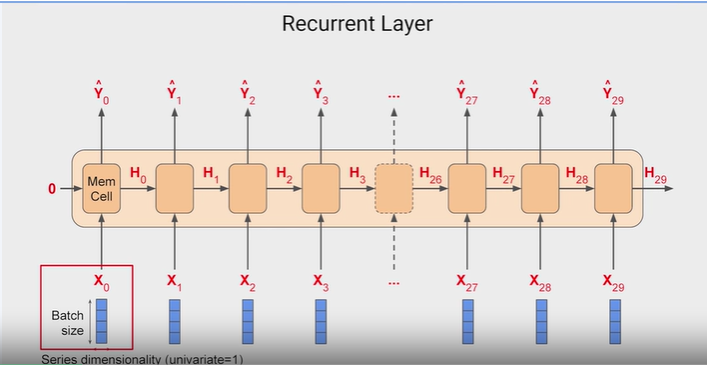

- **Hubungan antara Output dan State dalam RNN Sederhana**  
  Pada RNN sederhana, output `H` dari *state* hanya merupakan salinan dari matriks output `Y`. Misalnya, `H_0` adalah salinan dari `Y_0`, `H_1` adalah salinan dari `Y_1`, dan seterusnya.

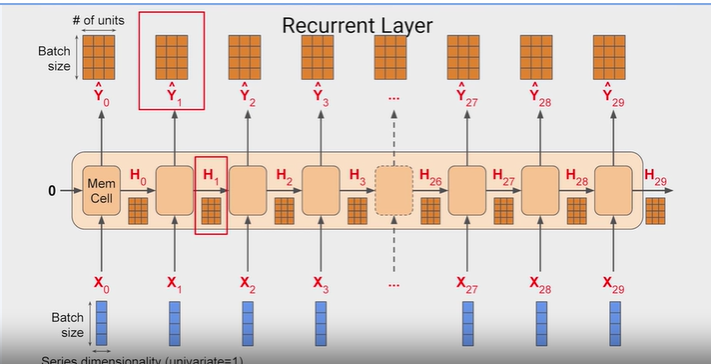

- **Sequence-to-Vector RNN**  
  Ada beberapa kasus di mana kita mungkin ingin memasukkan urutan (*sequence*) sebagai input tetapi hanya ingin satu vektor sebagai output untuk setiap contoh dalam batch. Tipe ini biasanya disebut sebagai *sequence-to-vector RNN*. Cara kerjanya adalah dengan mengabaikan seluruh output kecuali yang terakhir.

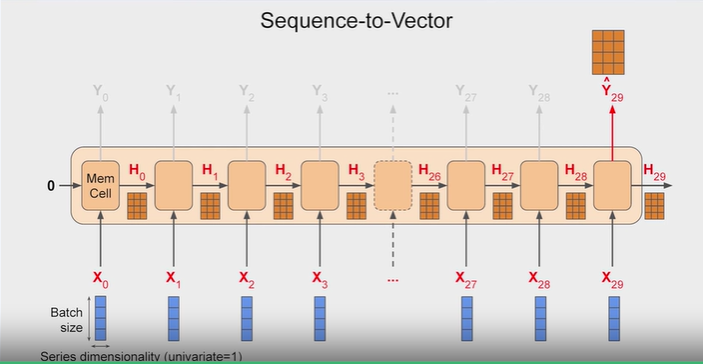

- **Pengaturan pada Keras dengan TensorFlow**  
  Saat menggunakan Keras di TensorFlow, tipe keluaran ini merupakan perilaku standar. Jika kita ingin sebuah layer RNN mengeluarkan urutan (*sequence*), kita perlu mengatur `return_sequences=True` saat membuat layer tersebut. Pengaturan ini diperlukan saat kita menumpuk layer RNN di atas layer RNN lainnya.
  
### Contoh Kode

Berikut adalah contoh untuk mengatur *return_sequences* pada sebuah layer RNN di Keras:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

# Membuat model RNN sederhana dengan output berformat sequence
model = Sequential()
model.add(SimpleRNN(units=3, return_sequences=True, input_shape=(30, 1)))

model.summary()

## Memahami RNN dengan Dua Lapisan Recurrent

Jadi, pertimbangkan RNN ini. RNN ini memiliki dua lapisan recurrent, dan lapisan pertama memiliki **return sequences** diset ke **true**. Ini akan menghasilkan sebuah urutan yang diberikan ke lapisan berikutnya. Lapisan berikutnya tidak memiliki **return sequences** diset ke **true**, jadi ia hanya akan menghasilkan output pada langkah terakhir.

### Bentuk Input

Namun, perhatikan bentuk inputnya; ini diset ke **window size** 1. TensorFlow mengasumsikan bahwa dimensi pertama adalah **batch size** dan dapat memiliki ukuran berapa pun. Jadi, Anda tidak perlu mendefinisikannya di sini. 

- Dimensi berikutnya adalah jumlah **timestamps**, yang akan kita set ke **window size**.
- Dimensi terakhir hanya satu karena Anda menggunakan **univariate time series**.

### Return Sequences

Jika kita mengatur **return sequences** ke **true** di semua lapisan recurrent, maka semuanya akan menghasilkan urutan, dan lapisan **dense** akan mendapatkan urutan sebagai inputnya. Keras menangani ini dengan menggunakan lapisan **dense** yang sama secara independen di setiap langkah waktu. 

Mungkin terlihat seperti beberapa lapisan di sini, tetapi itu adalah lapisan yang sama yang digunakan kembali di setiap langkah waktu. Ini memberi kita apa yang disebut sebagai **sequence to sequence RNN**. 

RNN ini diberi **batch** urutan, dan mengembalikan **batch** urutan dengan panjang yang sama. Dimensionalitas mungkin tidak selalu cocok, itu tergantung pada jumlah unit dalam **memory cell**.

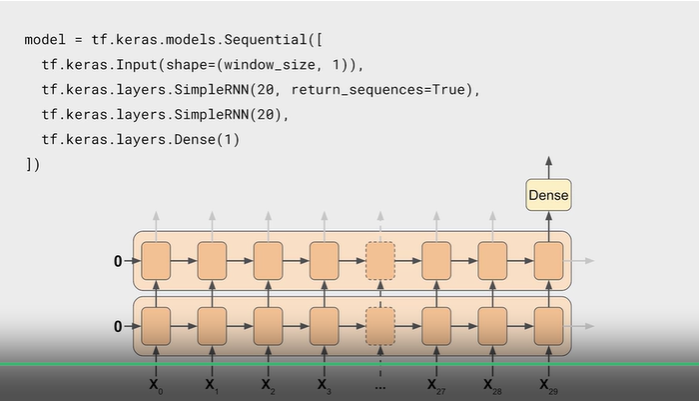

### Kembali ke RNN Dua Lapisan

Jadi, mari kita kembali ke RNN dengan dua lapisan yang memiliki lapisan kedua yang tidak mengembalikan urutan. Ini akan memberikan output ke **dense** tunggal.


### Memperkenalkan Lambda Layer

Saya ingin menunjukkan kepada Anda tentang **Lambda layer**. Jenis layer ini memungkinkan Anda untuk melakukan operasi arbitrer guna secara efektif memperluas fungsionalitas model dengan menambahkan layer kustom, dan Anda dapat melakukan ini dalam definisi model itu sendiri.

#### Contoh Penggunaan

Sebagai contoh, jika kita memperbesar output dengan mengalikan 100, kita dapat membantu proses pelatihan. Fungsi aktivasi default pada layer RNN adalah **tanh**, yang merupakan fungsi aktivasi hiperbolik tangen, dan output-nya memiliki nilai antara negatif satu dan satu. 

Karena nilai time series biasanya berada di kisaran puluhan, seperti 40, 50, 60, dan 70, maka memperbesar output ke rentang yang sama dapat membantu kita dalam pembelajaran. Kita bisa melakukan ini di **Lambda layer** juga. Kita cukup mengalikan output dengan 100.

#### Membangun RNN Lengkap

Mari kita lihat apa saja yang diperlukan untuk membangun **RNN** secara lengkap sehingga kita bisa mulai melakukan beberapa prediksi dengan itu. Anda akan melihatnya di video berikutnya.

# Pemrograman RNN untuk Prediksi Waktu

Pada video sebelumnya, Anda telah melihat **RNN** dan bagaimana mereka dapat digunakan untuk prediksi *sequence to vector* atau *sequence to sequence*. Sekarang, mari kita lihat cara mengkodekannya untuk masalah yang dihadapi dan melihat apakah kita dapat mendapatkan prediksi yang baik dalam *time series* kita.

## Optimalisasi Neural Network

Satu hal yang akan Anda lihat di sisa pelajaran ke depan adalah saya ingin menulis sedikit kode untuk mengoptimalkan *neural network* untuk *learning rate* dari *optimizer*. Ini bisa sangat cepat untuk dilatih, dan dari sana, kita dapat menghemat banyak waktu dalam *hyperparameter tuning*.

### Kode untuk Melatih RNN

Berikut adalah kode untuk melatih RNN dengan dua lapisan, masing-masing dengan 40 sel. Perhatikan bentuk input di sini, yang merupakan ukuran jendela satu, dan memiliki dimensi tambahan yang tidak Anda gunakan saat hanya berurusan dengan lapisan padat minggu lalu.

Untuk mendapatkan dimensi tambahan ini, Anda harus menambahkan satu baris ke fungsi *window to dataset*, yang memperluas dimensi untuk mencocokkan input yang diharapkan untuk lapisan RNN.

### Penyetelan Learning Rate

Untuk menyetel *learning rate*, kita akan menyiapkan *callback*, yang dapat Anda lihat di sini. Setiap epoch, ini hanya mengubah *learning rate* sedikit, dan Anda dapat melihat pengaturannya di sini saat pelatihan.

Saya juga telah memperkenalkan fungsi kerugian baru yang disebut **Huber**, yang dapat Anda lihat di sini. Fungsi Huber adalah fungsi kerugian yang kurang sensitif terhadap *outliers*, dan karena data ini bisa sedikit bising, ini layak untuk dicoba.

### Mengukur Hasil

Jika saya menjalankan ini selama 100 epoch dan mengukur kerugian di setiap epoch, saya akan melihat bahwa *learning rate* optimum saya untuk *stochastic gradient descent* berada di antara sekitar \(10^{-5}\) dan \(10^{-6}\). Sekarang, saya akan mengatur model saya untuk dikompilasi dengan *learning rate* tersebut dan *stochastic gradient descent optimizer*.

Setelah dilatih selama 500 epoch, kami akan mendapatkan grafik ini dengan **MAE** di set validasi sekitar 6.35. Ini tidak buruk, tetapi saya bertanya-tanya apakah kita bisa melakukan lebih baik.

Berikut adalah kerugian dan **MAE** saat pelatihan, dengan grafik di sebelah kanan diperbesar ke beberapa epoch terakhir. Seperti yang Anda lihat, tren umumnya menurun hingga sedikit setelah 400 epoch ketika mulai tidak stabil.

## Kesimpulan

Mengingat hal ini, mungkin hanya layak untuk melatih selama sekitar 400 epoch, dan ketika saya melakukannya, saya mendapatkan hasil ini. Hasilnya hampir sama dengan **MAE**, hanya sedikit lebih tinggi, tetapi kami telah menghemat pelatihan selama 100 epoch, sehingga itu layak.

Sekilas tentang **MAE** dan kerugian pelatihan memberikan hasil ini. Kami telah melakukannya dengan cukup baik, dan itu hanya menggunakan **RNN** sederhana. Mari kita lihat bagaimana kita dapat meningkatkan ini dengan **LSTM**, dan Anda akan melihat itu di video berikutnya.